In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os

dtypes = {
    "date" : "str",
    "cell_ll_lat": "float32",
    "cell_ll_lon": "float32",
    "mmsi": "int32",
    "hours": "float32",
    "fishing_hours": "float32",
    "flag_registry": "category",
    "vessel_class_inferred": "category",
    "vessel_class_registry": "category",
    "vessel_class_gfw": "category",
    "vessel_class_inferred_score": "float32",
    "self_reported_fishing_vessel": "boolean",
    "length_m_inferred": "float32",
    "length_m_registry": "float32",
    "length_m_gfw": "float32",
    "engine_power_kw_inferred": "float32",
    "engine_power_kw_registry": "float32",
    "engine_power_kw_gfw": "float32",
    "tonnage_gt_inferred": "float32",
    "tonnage_gt_registry": "float32",
    "tonnage_gt_gfw": "float32",
    "fishing_hours_2019": "float32",
    "fishing_hours_2020": "float32"
}

df = pd.read_csv('data\MMSI-daily-merged_2019_2020-vessels.csv', dtype=dtypes)

In [11]:
df.head()

,date,cell_ll_lat,cell_ll_lon,mmsi,hours,fishing_hours,flag_registry,vessel_class_inferred,vessel_class_inferred_score,vessel_class_registry,...,length_m_registry,length_m_gfw,engine_power_kw_inferred,engine_power_kw_registry,engine_power_kw_gfw,tonnage_gt_inferred,tonnage_gt_registry,tonnage_gt_gfw,fishing_hours_2019,fishing_hours_2020
0,2019-01-01 00:00:00,0.0,-105.599998,224900000,0.2036,0.0,ESP,drifting_longlines,0.987,drifting_longlines,...,32.77,32.77,555.359985,435.970001,435.970001,440.299988,398.029999,398.029999,2274.699951,832.679993
1,2019-01-01 00:00:00,0.0,-105.300003,224900000,0.0205,0.0,ESP,drifting_longlines,0.987,drifting_longlines,...,32.77,32.77,555.359985,435.970001,435.970001,440.299988,398.029999,398.029999,2274.699951,832.679993
2,2019-01-01 00:00:00,0.0,-105.500000,224900000,0.9008,0.0,ESP,drifting_longlines,0.987,drifting_longlines,...,32.77,32.77,555.359985,435.970001,435.970001,440.299988,398.029999,398.029999,2274.699951,832.679993
3,2019-01-01 00:00:00,0.0,-105.400002,224900000,0.8638,0.0,ESP,drifting_longlines,0.987,drifting_longlines,...,32.77,32.77,555.359985,435.970001,435.970001,440.299988,398.029999,398.029999,2274.699951,832.679993
4,2019-01-01 00:00:00,0.0,-0.300000,228071900,0.7969,0.0,FRA,tuna_purse_seines,0.982,tuna_purse_seines,...,77.00,77.00,3536.510010,3920.000000,3920.000000,2055.770020,2357.000000,2357.000000,1708.630005,1078.260010


In [30]:
# Count of nulls per column
null_counts = df.isnull().sum()
print('The total length of the dataset is', len(df))
print(null_counts)

The total length of the dataset is 107207569
date                                   0
cell_ll_lat                            0
cell_ll_lon                            0
mmsi                                   0
hours                                  0
fishing_hours                          0
flag_registry                   37786916
vessel_class_inferred             416397
vessel_class_inferred_score       416397
vessel_class_registry           38490242
vessel_class_gfw                       0
self_reported_fishing_vessel        4893
length_m_inferred                 416397
length_m_registry               44173679
length_m_gfw                       63654
engine_power_kw_inferred          416397
engine_power_kw_registry        58932464
engine_power_kw_gfw               121350
tonnage_gt_inferred               416397
tonnage_gt_registry             41229283
tonnage_gt_gfw                     42841
fishing_hours_2019               4184254
fishing_hours_2020               5090115
dtype: int64

In [28]:
df.describe()

,cell_ll_lat,cell_ll_lon,mmsi,hours,fishing_hours,vessel_class_inferred_score,length_m_inferred,length_m_registry,length_m_gfw,engine_power_kw_inferred,engine_power_kw_registry,engine_power_kw_gfw,tonnage_gt_inferred,tonnage_gt_registry,tonnage_gt_gfw,fishing_hours_2019,fishing_hours_2020
count,1.072076e+08,1.072076e+08,1.072076e+08,1.072076e+08,1.072076e+08,1.067912e+08,1.067912e+08,6.303389e+07,1.071439e+08,1.067912e+08,4.827510e+07,1.070862e+08,1.067912e+08,6.597829e+07,1.071647e+08,1.030233e+08,1.021175e+08
mean,2.580273e+01,3.461227e+01,3.820234e+08,2.975436e+00,9.634095e-01,8.606482e-01,3.493492e+01,4.044405e+01,3.477318e+01,7.630605e+02,1.006877e+03,7.949516e+02,4.558824e+02,6.688690e+02,4.665282e+02,2.033050e+03,2.020379e+03
std,3.090994e+01,9.616588e+01,1.489022e+08,5.470000e+00,2.435334e+00,1.546042e-01,1.850177e+01,2.175223e+01,1.962791e+01,8.481111e+02,1.167941e+03,9.736342e+02,7.633503e+02,1.041755e+03,8.719523e+02,1.786800e+03,1.760097e+03
min,-7.790000e+01,-1.800000e+02,1.280000e+02,0.000000e+00,0.000000e+00,5.000000e-01,7.150000e+00,5.300000e+00,5.300000e+00,2.170000e+01,1.315000e+01,1.315000e+01,2.410000e+00,1.180000e+00,1.180000e+00,0.000000e+00,0.000000e+00
25%,4.700000e+00,-1.640000e+01,2.572052e+08,4.163000e-01,0.000000e+00,7.520000e-01,2.114000e+01,2.313000e+01,2.074000e+01,2.689400e+02,3.300000e+02,2.640600e+02,6.714000e+01,9.800000e+01,6.200000e+01,5.334000e+02,5.445300e+02
50%,3.460000e+01,1.990000e+01,4.123287e+08,8.022000e-01,0.000000e+00,9.280000e-01,2.757000e+01,3.600000e+01,2.705000e+01,4.427600e+02,6.600000e+02,4.429900e+02,1.524500e+02,3.290000e+02,1.413800e+02,1.429810e+03,1.432070e+03
75%,4.800000e+01,1.212000e+02,4.166390e+08,2.355200e+00,8.686000e-01,9.960000e-01,4.796000e+01,5.427000e+01,4.750000e+01,8.431800e+02,1.044400e+03,8.690000e+02,5.014400e+02,7.478700e+02,4.990000e+02,3.254370e+03,3.203700e+03
max,8.170000e+01,1.799000e+02,1.020002e+09,4.793990e+01,4.755860e+01,1.000000e+00,1.713800e+02,2.553900e+02,2.553900e+02,8.090110e+03,1.638999e+04,1.638999e+04,9.629170e+03,1.405500e+04,1.405500e+04,7.584200e+03,8.665690e+03


C:\Users\laure\AppData\Local\Temp\ipykernel_17788\4169668877.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_fishing_hours_2019 = df.groupby('flag_registry')['fishing_hours_2019'].sum().reset_index()


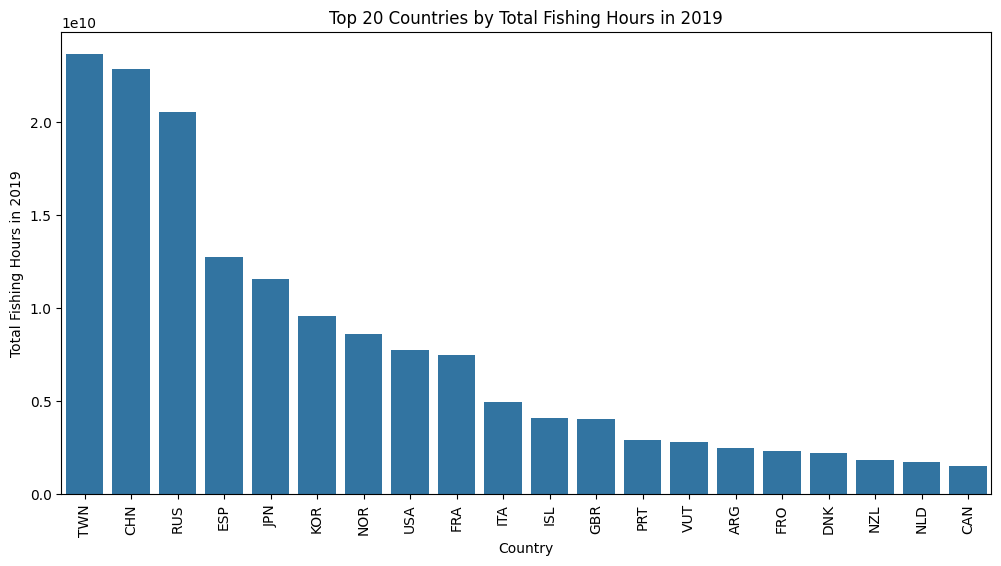

In [18]:
# Sum fishing hours by country for 2019
country_fishing_hours_2019 = df.groupby('flag_registry')['fishing_hours_2019'].sum().reset_index()

# Sort by fishing hours, top 20
top_20_countries_2019 = country_fishing_hours_2019.sort_values(by='fishing_hours_2019', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='flag_registry', y='fishing_hours_2019', data=top_20_countries_2019, 
            order=top_20_countries_2019.sort_values('fishing_hours_2019', ascending=False)['flag_registry'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total Fishing Hours in 2019')
plt.title('Top 20 Countries by Total Fishing Hours in 2019')
plt.show()

C:\Users\laure\AppData\Local\Temp\ipykernel_17788\1967064983.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_fishing_hours_2020 = df.groupby('flag_registry')['fishing_hours_2020'].sum().reset_index()


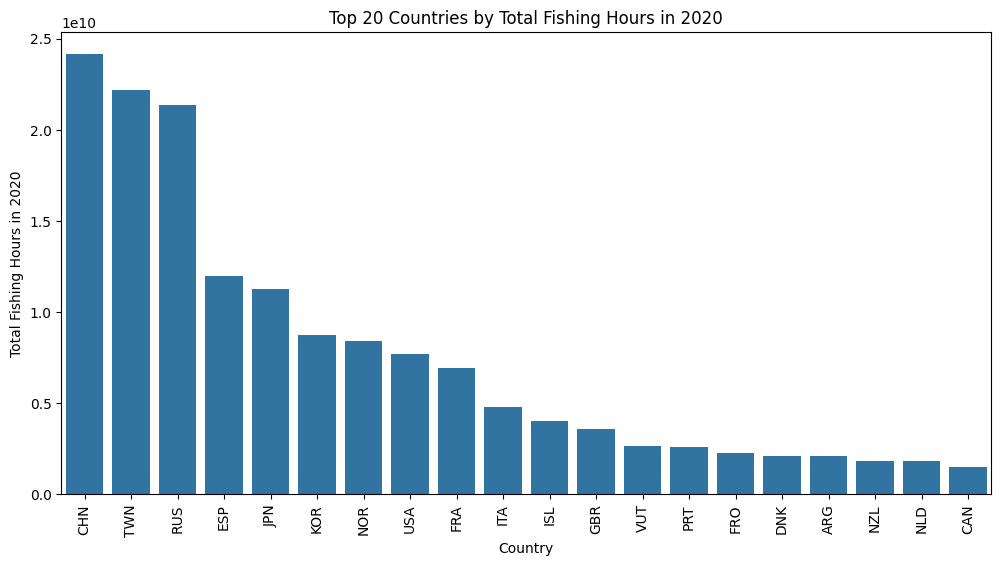

In [21]:
# Sum fishing hours by country for 2020
country_fishing_hours_2020 = df.groupby('flag_registry')['fishing_hours_2020'].sum().reset_index()

# Sort by fishing hours, top 20
top_20_countries_2020 = country_fishing_hours_2020.sort_values(by='fishing_hours_2020', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='flag_registry', y='fishing_hours_2020', data=top_20_countries_2020, 
            order=top_20_countries_2020.sort_values('fishing_hours_2020', ascending=False)['flag_registry'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total Fishing Hours in 2020')
plt.title('Top 20 Countries by Total Fishing Hours in 2020')
plt.show()

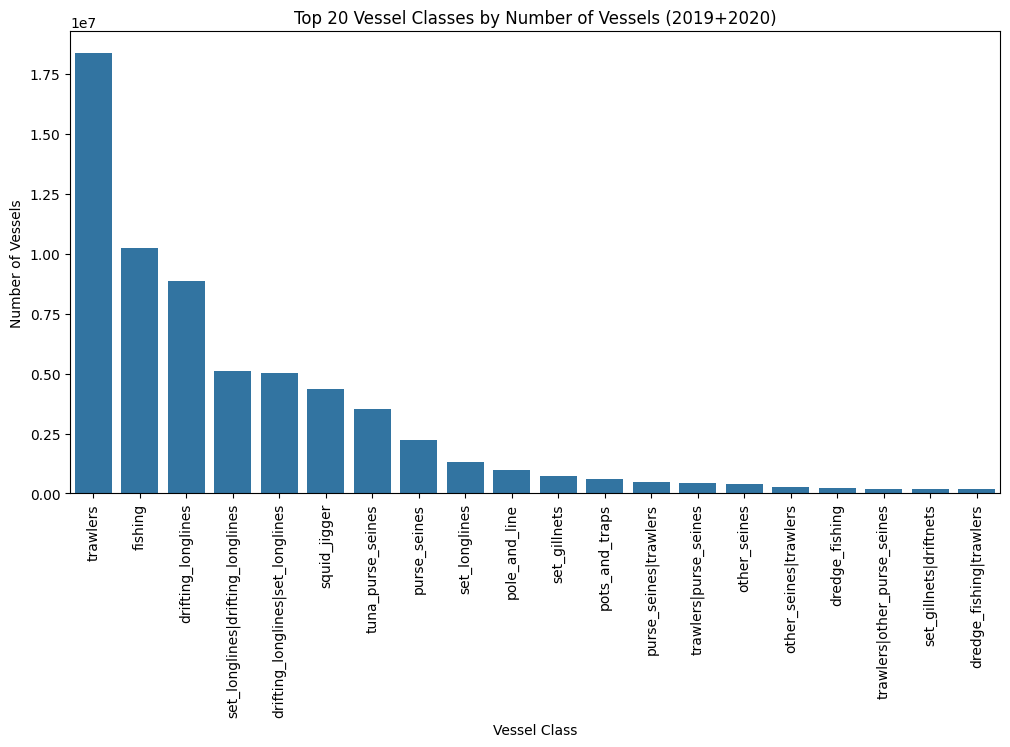

In [26]:
# Count number of vessels in each class
vessel_class_counts = df['vessel_class_registry'].value_counts().reset_index()
vessel_class_counts.columns = ['vessel_class_registry', 'count']

# Sort to top 20 types
top_20_vessel_classes = vessel_class_counts.sort_values(by='count', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='vessel_class_registry', y='count', data=top_20_vessel_classes, 
            order=top_20_vessel_classes['vessel_class_registry'])
plt.xticks(rotation=90)
plt.xlabel('Vessel Class')
plt.ylabel('Number of Vessels')
plt.title('Top 20 Vessel Classes by Number of Vessels (2019+2020)')
plt.show()